In [1]:
from google.colab import drive
drive.mount("/content/gdrive")
import os
os.chdir("/content/gdrive/My Drive/cs747/CS747_Assignment3/v2")
%ls
!pip3 install torch torchvision
import torch

Mounted at /content/gdrive
aalkhami_mp3_part1_output.ipynb
aalkhami_mp3_part2_output-Copy1.ipynb
aalkhami_mp3_part3_output.ipynb
celeba_data/
gan/
GAN_debugging_copy.ipynb
GAN_debugging.ipynb
gan_samples/
imagenette2-320/
imagenette2-320.tgz
MNIST_data/
MP3_P1.ipynb
resnet18-f37072fd.pth
Spring_2023_CS_747_Deep_Learning_Assignment-3.pdf
Untitled.ipynb
Without_Spectral_norm.ipynb
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import torch
import torchvision
import torchvision.transforms as transforms
from torchvision import models
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
import torch.nn.functional as F
from PIL import Image, ImageFilter
from torchvision.transforms.functional import to_pil_image, to_tensor
from torchvision.transforms import ToPILImage, ToTensor
from torchvision.datasets import ImageFolder

# Part 3.1 FGSM

In [3]:
# Load pretrained ResNet18 model
# Load saved model
model_path = "resnet18-f37072fd.pth"
model = models.resnet18()
model.load_state_dict(torch.load(model_path))
model.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [4]:
# Load the Imagenette dataset
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])
trainset = torchvision.datasets.ImageFolder(root="imagenette2-320/train", transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=1, shuffle=True, num_workers=2)
testset = torchvision.datasets.ImageFolder(root="imagenette2-320/val", transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=1, shuffle=True, num_workers=2)

In [5]:
# Set the device to GPU if available
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model.to(device)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [6]:
# Set the criterion
criterion = nn.CrossEntropyLoss()

In [7]:
# FGSM attack code
def fgsm_attack(image, epsilon, data_grad):
    sign_data_grad = data_grad.sign()
    perturbed_image = image + epsilon * sign_data_grad
    perturbed_image = torch.clamp(perturbed_image, 0, 1)
    return perturbed_image

# Function to display images
def imshow(img):
    img = img / 2 + 0.5  # Unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# Function to calculate accuracy
def calculate_accuracy(model, images, labels):
    outputs = model(images)
    _, predicted = torch.max(outputs.data, 1)
    correct = (predicted == labels).sum().item()
    return correct / labels.size(0) * 100

Sample 1:
Original Image


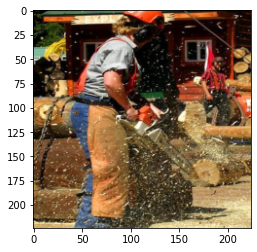

Accuracy: 0.0%
Perturbed Image


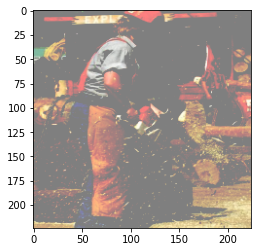

Accuracy: 0.0%
Sample 2:
Original Image


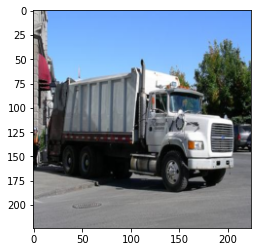

Accuracy: 0.0%
Perturbed Image


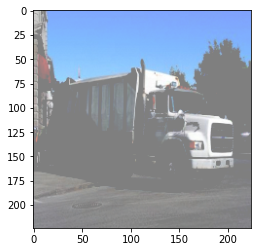

Accuracy: 0.0%
Sample 3:
Original Image


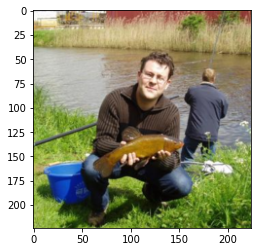

Accuracy: 100.0%
Perturbed Image


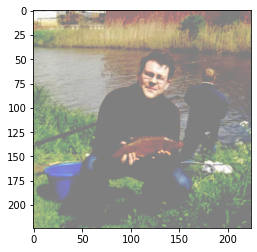

Accuracy: 0.0%
Sample 4:
Original Image


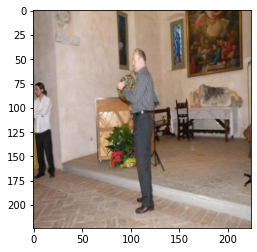

Accuracy: 0.0%
Perturbed Image


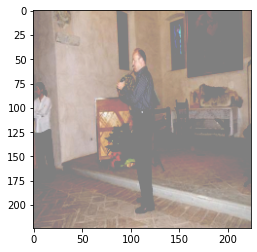

Accuracy: 0.0%
Sample 5:
Original Image


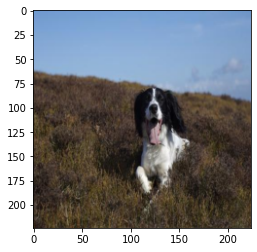

Accuracy: 0.0%
Perturbed Image


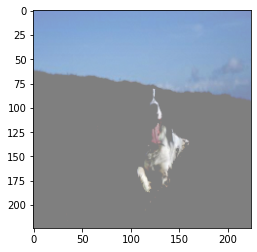

Accuracy: 0.0%
Average accuracy on original images: 8.254777070063694%
Average accuracy on perturbed images: 1.3248407643312101%


In [ ]:
# Set the epsilon value and the number of samples to display
epsilon = 0.007
num_samples = 5
sample_counter = 0

imagenette_labels = {
    0: 389,  # 'tench'
    1: 450,  # 'English springer'
    2: 527,  # 'cassette player'
    3: 604,  # 'chain saw'
    4: 609,  # 'church'
    5: 816,  # 'French horn'
    6: 818,  # 'garbage truck'
    7: 827,  # 'gas pump'
    8: 896,  # 'golf ball'
    9: 972   # 'parachute'
}

total_correct_original = 0
total_correct_perturbed = 0
total_samples = 0

for images, labels in testloader:
    if labels[0].item() not in imagenette_labels:
        continue

    images, labels = images.to(device), labels.to(device)
    images.requires_grad = True

    accuracy_original = calculate_accuracy(model, images, labels)

    outputs = model(images)
    loss = criterion(outputs, labels)
    model.zero_grad()
    loss.backward()

    data_grad = images.grad.data
    perturbed_images = fgsm_attack(images, epsilon, data_grad)

    accuracy_perturbed = calculate_accuracy(model, perturbed_images, labels)

    perturbed_images_cpu = perturbed_images.detach().cpu()

    total_correct_original += accuracy_original
    total_correct_perturbed += accuracy_perturbed
    total_samples += 1

    if sample_counter < num_samples:
        print(f"Sample {sample_counter + 1}:")
        print("Original Image")
        imshow(images[0].detach().cpu())
        print(f"Accuracy: {accuracy_original}%")
        print("Perturbed Image")
        imshow(perturbed_images_cpu[0])
        print(f"Accuracy: {accuracy_perturbed}%")

        sample_counter += 1

# Calculate and print average accuracy
average_accuracy_original = total_correct_original / total_samples
average_accuracy_perturbed = total_correct_perturbed / total_samples
print(f"Average accuracy on original images: {average_accuracy_original}%")
print(f"Average accuracy on perturbed images: {average_accuracy_perturbed}%")

# Part 3.2 Iterative Gradient Sign Method

In [8]:
# Define the Iterative Gradient Sign Method function
def iterative_gradient_sign_attack(model, criterion, image, label, epsilon, alpha, num_iterations):
    perturbed_image = image.clone().detach().requires_grad_(True)
    for _ in range(num_iterations):
        output = model(perturbed_image)
        loss = criterion(output, label)
        model.zero_grad()
        loss.backward()

        gradient = perturbed_image.grad.data
        perturbed_image = fgsm_attack(perturbed_image, alpha, gradient)
        perturbation = perturbed_image - image
        perturbation = torch.clamp(perturbation, -epsilon, epsilon)
        perturbed_image = image + perturbation
        perturbed_image = torch.clamp(perturbed_image, 0, 1).detach().requires_grad_(True)
    return perturbed_image

Sample 1:
Original Image


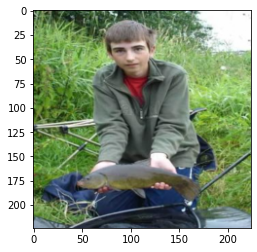

Accuracy: 100.0%
Perturbed Image


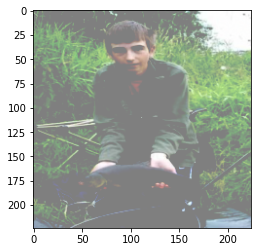

Accuracy: 100.0%
Sample 2:
Original Image


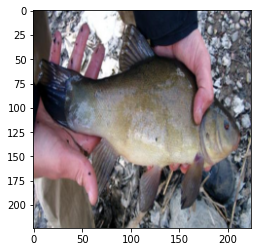

Accuracy: 100.0%
Perturbed Image


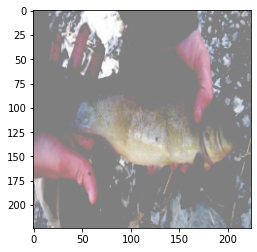

Accuracy: 0.0%
Sample 3:
Original Image


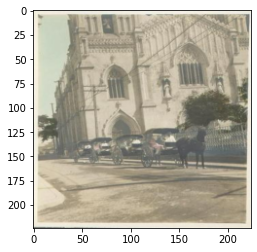

Accuracy: 0.0%
Perturbed Image


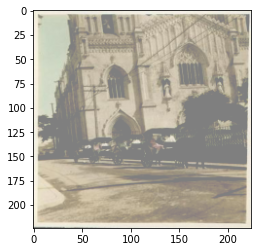

Accuracy: 0.0%
Sample 4:
Original Image


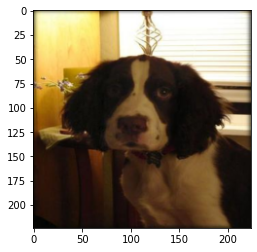

Accuracy: 0.0%
Perturbed Image


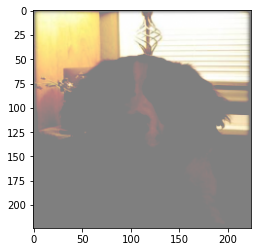

Accuracy: 0.0%
Sample 5:
Original Image


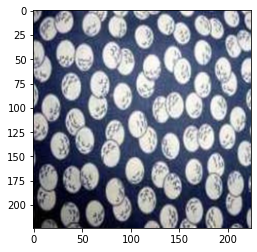

Accuracy: 0.0%
Perturbed Image


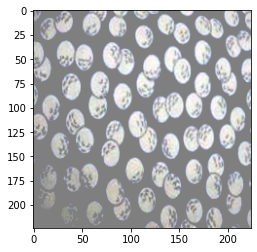

Accuracy: 0.0%
Average accuracy on original images: 8.254777070063694%
Average accuracy on perturbed images: 2.1146496815286624%


In [ ]:
epsilon = 0.0005
alpha = 0.005
num_iterations = 10
num_samples = 5
sample_counter = 0
imagenette_labels = {
    0: 389,  # 'tench'
    1: 450,  # 'English springer'
    2: 527,  # 'cassette player'
    3: 604,  # 'chain saw'
    4: 609,  # 'church'
    5: 816,  # 'French horn'
    6: 818,  # 'garbage truck'
    7: 827,  # 'gas pump'
    8: 896,  # 'golf ball'
    9: 972   # 'parachute'
}

total_correct_original = 0
total_correct_perturbed = 0
total_samples = 0

for images, labels in testloader:
    if labels[0].item() not in imagenette_labels:
        continue

    images, labels = images.to(device), labels.to(device)
    images.requires_grad = True

    accuracy_original = calculate_accuracy(model, images, labels)

    outputs = model(images)
    loss = criterion(outputs, labels)
    model.zero_grad()
    loss.backward()

    data_grad = images.grad.data
    perturbed_images = iterative_gradient_sign_attack(model, criterion, images, labels, epsilon, alpha, num_iterations)

    accuracy_perturbed = calculate_accuracy(model, perturbed_images, labels)

    perturbed_images_cpu = perturbed_images.detach().cpu()

    total_correct_original += accuracy_original
    total_correct_perturbed += accuracy_perturbed
    total_samples += 1

    if sample_counter < num_samples:
        print(f"Sample {sample_counter + 1}:")
        print("Original Image")
        imshow(images[0].detach().cpu())
        print(f"Accuracy: {accuracy_original}%")
        print("Perturbed Image")
        imshow(perturbed_images_cpu[0])
        print(f"Accuracy: {accuracy_perturbed}%")

        sample_counter += 1

# Calculate and print average accuracy
average_accuracy_original = total_correct_original / total_samples
average_accuracy_perturbed = total_correct_perturbed / total_samples
print(f"Average accuracy on original images: {average_accuracy_original}%")
print(f"Average accuracy on perturbed images: {average_accuracy_perturbed}%")    

# Part 3.3 Input transformations (Gaussian blur and resizing)

In [13]:
# Load pretrained ResNet18 model
# Load saved model

learning_rate = 0.0002
model_path = "resnet18-f37072fd.pth"
model = models.resnet18()
model.load_state_dict(torch.load(model_path))
model.eval()
model.to(device)
# Set the criterion
criterion = nn.CrossEntropyLoss()

In [10]:
def apply_gaussian_blur(image, radius=2):
    blurred_image = image.filter(ImageFilter.GaussianBlur(radius))
    return blurred_image

def resize_image(image, size=(224, 224)):
    resized_image = image.resize(size, Image.ANTIALIAS)
    return resized_image

In [11]:
# Set up the DataLoader and transformations
data_transforms = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

test_dataset = ImageFolder("imagenette2-320/val", transform=data_transforms)
testloader = torch.utils.data.DataLoader(test_dataset, batch_size=32, shuffle=True)


Sample 1:
Original Image


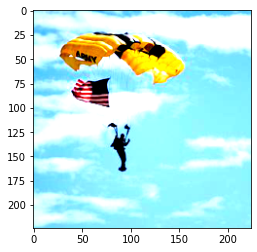

Accuracy: 0.0%
Perturbed Image


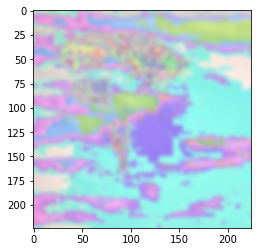

Accuracy: 0.0%


Sample 2:
Original Image


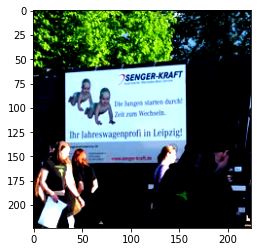

Accuracy: 0.0%
Perturbed Image


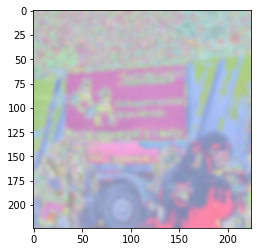

Accuracy: 0.0%


Sample 3:
Original Image


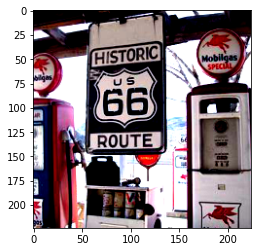

Accuracy: 6.25%
Perturbed Image


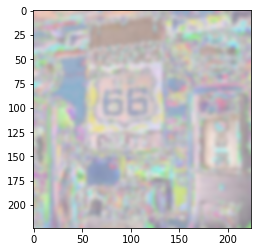

Accuracy: 6.25%


Sample 4:
Original Image


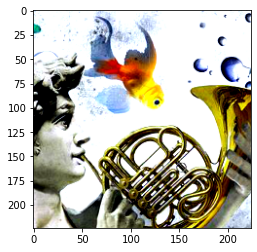

Accuracy: 0.0%
Perturbed Image


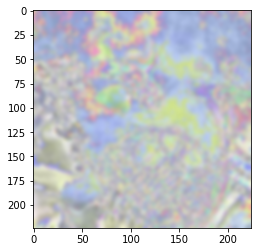

Accuracy: 0.0%


Sample 5:
Original Image


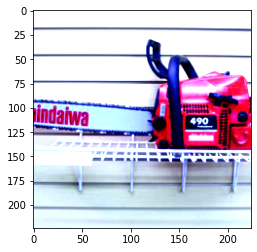

Accuracy: 0.0%
Perturbed Image


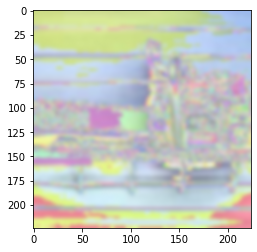

Accuracy: 0.0%
Average accuracy on original images: 0.48272357723577236%
Average accuracy on perturbed images: 0.3048780487804878%


In [15]:
epsilon = 0.0005
alpha = 0.05
num_iterations = 10
num_samples = 5
sample_counter = 0
imagenette_labels = {
    0: 389,  # 'tench'
    1: 450,  # 'English springer'
    2: 527,  # 'cassette player'
    3: 604,  # 'chain saw'
    4: 609,  # 'church'
    5: 816,  # 'French horn'
    6: 818,  # 'garbage truck'
    7: 827,  # 'gas pump'
    8: 896,  # 'golf ball'
    9: 972   # 'parachute'
}


total_correct_original = 0
total_correct_perturbed = 0
total_samples = 0

for images, labels in testloader:
    if labels[0].item() not in imagenette_labels:
        continue

    images, labels = images.to(device), labels.to(device)

    # Apply input transformations (Gaussian blur and resizing) to the original images
    transformed_images = []
    for img in images:
        img_pil = to_pil_image(img.cpu())  # Convert to PIL image
        blurred_img = apply_gaussian_blur(img_pil)
        resized_img = resize_image(blurred_img)
        transformed_img = to_tensor(resized_img).to(device)  # Convert back to tensor and move to device
        transformed_images.append(transformed_img)
    transformed_images = torch.stack(transformed_images)

    accuracy_original = calculate_accuracy(model, transformed_images, labels)

    transformed_images.requires_grad = True

    outputs = model(transformed_images)
    loss = criterion(outputs, labels)
    model.zero_grad()
    loss.backward()

    data_grad = transformed_images.grad.data
    perturbed_images = fgsm_attack(transformed_images, epsilon, data_grad)

    # Apply input transformations (Gaussian blur and resizing) to the perturbed images
    transformed_perturbed_images = []
    for img in perturbed_images:
        img_pil = to_pil_image(img.cpu())  # Convert to PIL image
        blurred_img = apply_gaussian_blur(img_pil)
        resized_img = resize_image(blurred_img)
        transformed_img = to_tensor(resized_img).to(device)  # Convert back to tensor and move to device
        transformed_perturbed_images.append(transformed_img)
    transformed_perturbed_images = torch.stack(transformed_perturbed_images)

    accuracy_perturbed = calculate_accuracy(model, transformed_perturbed_images, labels)

    perturbed_images_cpu = perturbed_images.detach().cpu()

    total_correct_original += accuracy_original
    total_correct_perturbed += accuracy_perturbed
    total_samples += 1

    if sample_counter < num_samples:
        print(f"Sample {sample_counter + 1}:")
        print("Original Image")
        imshow(images[0].detach().cpu())
        print(f"Accuracy: {accuracy_original}%")
        print("Perturbed Image")
        imshow(perturbed_images_cpu[0])
        print(f"Accuracy: {accuracy_perturbed}%")

        sample_counter += 1

# Calculate and print average accuracy
average_accuracy_original = total_correct_original / total_samples
average_accuracy_perturbed = total_correct_perturbed / total_samples
print(f"Average accuracy on original images: {average_accuracy_original}%")
print(f"Average accuracy on perturbed images: {average_accuracy_perturbed}%")
